In [1]:
path = "../src"
push!(LOAD_PATH, path);
run(`ls $path`);

GenDistributionZoo.jl
diag_normal.jl
product_dist.jl
push_forward.jl


In [13]:
#nbx --fname=../src/GenDistributionZoo.jl --jl_module=GenDistributionZoo
using Gen

include("../src/push_forward.jl")
include("../src/diag_normal.jl")
include("../src/product_dist.jl")

# Testing it out

In [36]:
using BenchmarkTools
using Gen: logpdf, mvnormal
using GenDistributionZoo: diagnormal

n    = 50
mus  = range(-5,5, n);
stds = ones(n);
xs   = rand(n);

diagnormal(mus, stds), logpdf(diagnormal, xs, mus, stds)

([-4.538810280629345, -5.555034382250925, -4.446351250798156, -5.10633212402355, -3.5407018013460143, -3.003390405924056, -5.341218835954468, -4.652476073142416, -3.601601591971693, -2.139149276521821  …  2.3858283846517256, 3.8383437942640155, 4.093340587793257, 3.261822268662394, 4.3679098634127955, 5.184841445895259, 4.69284223748214, 4.527292958293314, 4.286802279311255, 3.8856752240886285], -264.3872349981801)

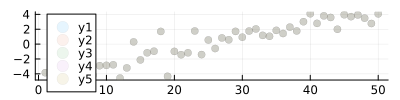

In [37]:
using Plots
samples =[diagnormal(mus, stds) for t=1:1_000]

myplot = plot(size=(400,100))
for i = 1:5
scatter!(1:n,samples[1], alpha=0.1)
end
myplot

In [13]:
using LinearAlgebra: diagm


n    = 1_000
mus  = rand(n);
stds = ones(n);
xs   = rand(n);

println("Diagonal Gaussian `diagnormal`")
@btime diagnormal($mus, $stds);
# @btime logpdf($diagnormal, $xs, $mus, $stds);


println("Multivariate Gaussian `mvnormal`")

D = diagm(stds)
@btime mvnormal($mus, $D);
# @btime logpdf($mvnormal, $xs, $mus, $D);

Diagonal Gaussian `diagnormal`
  4.865 μs (1 allocation: 7.94 KiB)
Multivariate Gaussian `mvnormal`
  9.496 ms (6 allocations: 15.27 MiB)
